In [1]:
from gamefitter import *
import pandas as pd
import pickle

In [13]:
population = pickle.load(open('./data/optimization/population_edgeval_1.499.pickle','rb'))
population.sort(key=lambda x: x['error'])
len(population)

65

In [14]:
for p in population:
    print(p['error'], len(p['topology']))

1.4998973325224825 40
1.5099723113876617 51
1.5170173098423334 42
1.5170173098423334 42
1.5197689793852391 42
1.5199070541909703 36
1.5199070541909703 36
1.520008606435675 43
1.533377991150116 49
1.533377991150116 49
1.5336629801218915 51
1.5336629801218915 51
1.5338538178162389 43
1.5338538178162389 43
1.5364941720868572 54
1.5391145423353851 53
1.543489172217966 57
1.5514116134978841 45
1.5592262354775257 56
1.5730969513552062 68
1.5762313185916326 69
1.5824544617771457 42
1.5851879044605846 41
1.58948339236801 49
1.6010262952740768 52
1.6048580068875289 65
1.6077359471147106 46
1.6487805412004888 47
1.6595746365441677 54
1.67267252296244 65
1.683493141348374 42
1.699364255188474 52
1.715527934195859 46
1.7339493408560194 41
1.7649437686789422 45
1.798498491123199 40
1.8383818482838177 52
1.840854836362195 62
1.8788610466264077 49
1.914554116997116 44
1.9246974827706815 55
1.9473192075600827 41
1.9876643353335233 49
1.9884985334662322 36
2.085075668343183 60
2.209389989730069 61
2.32

In [4]:
population.sort(key=lambda x: len(x['topology']))

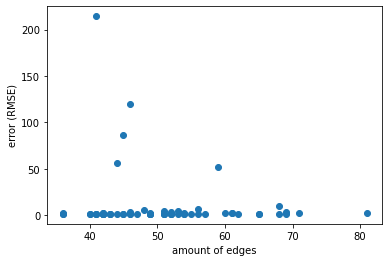

In [10]:
import matplotlib.pyplot as plt
plt.scatter([len(p['topology']) for p in population],[p['error'] for p in population])
plt.xlabel('amount of edges')
plt.ylabel('error (RMSE)')
plt.show()

In [6]:
#optimize
import scipy
from genetic import *
p = population[0]
def eval_fun(alpha, hypothesis):
    hypothesis['alpha'] = alpha
    return evaluate_edge(hypothesis)

x0=[0.5]
bnds = [(0.0, 1.0)]
r = scipy.optimize.minimize(eval_fun, x0, args=p, bounds=bnds, tol=0.001)
print(f"{r['x'][0]} => {r['fun']}")

AssertionError: Alpha is [0.5], not float

In [9]:
X=[]
Y=[]
for i in range(10):
    x = i/1000
    p['alpha']=x
    y = evaluate_edge(p)
    X.append(X)
    Y.append(Y)
    print(x, y)
    

0.0 1.6042516062751286
0.001 1.5123969799729815
0.002 1.5100341381439433
0.003 1.5906531385616904
0.004 1.7381295336189653
0.005 1.9359711423556512
0.006 2.1703035035177463
0.007 2.43068812570073
0.008 2.709788449800169
0.009 3.0025789170314265


In [15]:
for i, p in enumerate(population):
    print(i, p['error'], sum(p['starting_state']), len(p['topology']), p['alpha'])

0 1.4998973325224825 [464212 471149] 40 0.0015192957631572305
1 1.5099723113876617 [461065 484080] 51 0.0016208361991178915
2 1.5170173098423334 [418360 486492] 42 0.0016301259827493498
3 1.5170173098423334 [418360 486492] 42 0.0016301259827493498
4 1.5197689793852391 [418360 486492] 42 0.0016301259827493498
5 1.5199070541909703 [464212 471149] 36 0.0015192957631572305
6 1.5199070541909703 [464212 471149] 36 0.0015192957631572305
7 1.520008606435675 [418360 486492] 43 0.0016301259827493498
8 1.533377991150116 [461802 489439] 49 0.0011102527592696937
9 1.533377991150116 [461802 489439] 49 0.0011102527592696937
10 1.5336629801218915 [523137 445400] 51 0.001346408958974628
11 1.5336629801218915 [523137 445400] 51 0.001346408958974628
12 1.5338538178162389 [418360 486492] 43 0.0016301259827493498
13 1.5338538178162389 [418360 486492] 43 0.0016301259827493498
14 1.5364941720868572 [523137 445400] 54 0.001346408958974628
15 1.5391145423353851 [523137 445400] 53 0.001346408958974628
16 1.5434

In [48]:
p = population[0]
pd.DataFrame(p['starting_state'], index=country_names)

NameError: name 'country_names' is not defined

In [50]:
[a[0] for a in p['strategies']]

[array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]),
 array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]),
 array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]),
 array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]),
 array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1]),
 array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])]

In [17]:
pd.DataFrame(np.array([a[0] for a in p['strategies']]).transpose(), index=p['player_labels'], columns=list(range(2009,2019)))

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Germany,1,1,1,1,0,0,1,1,1,1
Luxembourg,1,0,1,1,1,1,0,1,1,0
Netherlands,0,0,0,0,0,1,0,0,1,0
Italy,0,1,0,1,0,0,1,1,1,0
United Kingdom,1,1,0,0,1,1,0,0,1,0
France,1,1,0,0,1,0,1,0,0,0
Austria,1,0,1,1,1,0,1,0,1,0
Sweden,0,1,0,0,0,0,1,1,1,0
Finland,0,0,0,1,0,0,0,1,0,1
Cyprus,0,0,1,1,1,0,0,1,0,0


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


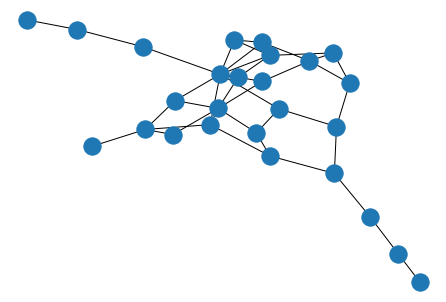

In [18]:
# look at the game graph
hypothesis = population[0]
game_settings = {
            "start_populations_matrix": hypothesis['starting_state'],
            "topology": hypothesis['topology'],
            'alpha': hypothesis['alpha'],
            'log_level': "warning",
            'player_labels':hypothesis['player_labels']
        }
game = PolymatrixGame(**game_settings)
import networkx as nx
G = game.network
nx.draw(G)

In [ ]:
# compute gameplay to understand node sizes

In [20]:
node_sizes = [sum(i)/100 for i in population[0]['starting_state']]
node_sizes

[839.85,
 46.69,
 1378.02,
 1043.97,
 2353.25,
 548.5,
 142.48,
 111.2,
 65.43,
 11.42,
 148.41,
 30.77,
 47.31,
 33.24,
 188.98,
 334.55,
 23.17,
 330.94,
 450.5,
 110.17,
 52.7,
 118.09,
 74.71,
 30.73,
 307.79,
 127.18,
 403.56]

In [21]:
len(node_sizes)

27

26


<IPython.core.display.Javascript object>


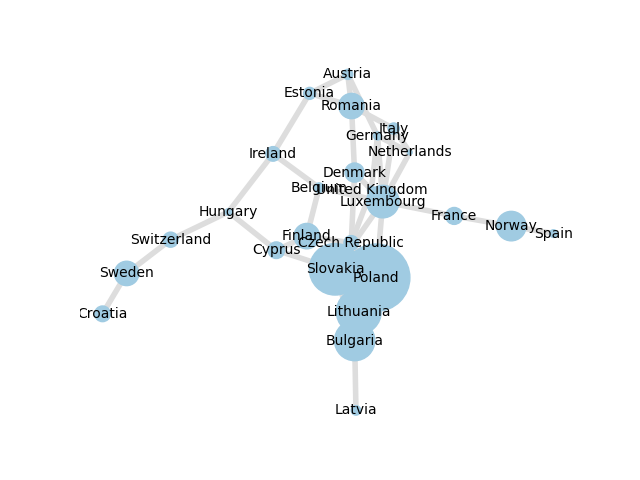

C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


In [22]:
country_names = population[0]['player_labels']

def visualize_kg(G):
    # https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
    # TODO: add edge labels
    %matplotlib nbagg
    import matplotlib.pyplot as plt

    import networkx as nx
    
    def remove_duplicates(x):
        return list(dict.fromkeys(x))

    edges = remove_duplicates(list(G.edges()))
    m = len(edges)
    nodes = list(G.nodes())
    n = len(nodes)
    print(len(nodes))
    pos=nx.spring_layout(G) # positions for all nodes
    
    # some math labels
    labels={}
    for node in nodes:
        labels[node] = str(country_names[node])
    
    colors=['#DDDDDD']*m
    nx.draw_networkx_labels(G,pos,labels,font_size=10)
    nx.draw(G, pos, node_size = node_sizes[0:n], node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=plt.cm.Blues, with_labels=False)

    plt.axis('off')
    plt.savefig("labels_and_colors.png") # save as png
    plt.show() # display
visualize_kg(G)

In [67]:
new_pops = []
for p in population:
    for i, arr in enumerate(p['starting_state']):
        for j, elem in enumerate(arr):
            if elem<0:
                p['starting_state'][i][j]=0
    p['error']=None
    new_pops.append(p)
print(len(new_pops))
pickle.dump(new_pops, open('./data/optimization/population_edge_3_11.xx.pickle','wb'))

70


## Crossing over

In [220]:
p1 = population[7]
p1

{'starting_state': [array([ 9, 47]),
  array([12, 34]),
  array([13, 18]),
  array([63,  2]),
  array([ 9, 48]),
  array([ 8, 38]),
  array([67,  2]),
  array([35, 28]),
  array([45, 48]),
  array([56,  9]),
  array([25, 12]),
  array([45, 60]),
  array([50, 20]),
  array([39, 64]),
  array([32, 42]),
  array([18, 18]),
  array([59,  0]),
  array([70, 12])],
 'strategies': [array([[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]]),
  array([[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]]),
  array([[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]]),
  array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]]),
  array([[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
  array([[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]]),
  array([[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]]),
  array([[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]]),
  array([[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]),
  array([[1, 0, 1, 0, 

In [211]:
p2 = population[10]

In [228]:
p2['strategies'][1][0][1]

1

In [3]:
from corpgame import PolymatrixGame
import numpy as np
import pickle

def in_list(candidate, full_list):
    for element in full_list:
        if candidate==element:
            return True
    return False


game_settings = {
        "start_populations_matrix": [[5, 10], [5, 5], [15, 5], [15, 5], [30, 5],[3,17]],
        "topology": "chain",
        'alpha': 0.7,
        'log_level': "warning"
    }
game = PolymatrixGame(**game_settings)
self = game.network
print(game.network.graph.edges)

keep_looking = True
n = len(self.graph.nodes)
m = len(self.graph.edges)
if m<n*(n-1)/2:
    edges = list(self.graph.edges)
    nodes = list(range(0,n))
    possible_edges = [
                    [nodes[i], nodes[j]]
                    for i in range(len(nodes))
                    for j in range(i + 1, len(nodes))
                ]
    temp_graph = self.graph.copy()
    while keep_looking and len(possible_edges)!=0: # try to remove edges but only if it doesn't disconnect the graph
        edge_candidate = tuple(possible_edges.pop(np.random.randint(0,len(possible_edges))))
        #print(edge_candidate, edges, in_list(edge_candidate, edges))
        if not in_list(edge_candidate, edges):
            temp_graph.add_edge(*edge_candidate)
            self.graph = temp_graph.copy()
            keep_looking=False
print(self.graph.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
[(0, 1), (1, 2), (1, 5), (2, 3), (3, 4), (4, 5)]


In [39]:
print(game.network.graph.edges)

keep_looking = True
n = len(self.graph.nodes)
m = len(self.graph.edges)
if m<n*(n-1)/2:
    edges = list(self.graph.edges)
    nodes = list(range(0,n))
    possible_edges = [
                    [nodes[i], nodes[j]]
                    for i in range(len(nodes))
                    for j in range(i + 1, len(nodes))
                ]
    temp_graph = self.graph.copy()
    while keep_looking and len(possible_edges)!=0: # try to remove edges but only if it doesn't disconnect the graph
        edge_candidate = tuple(possible_edges.pop(np.random.randint(0,len(possible_edges))))
        #print(edge_candidate, edges, in_list(edge_candidate, edges))
        if not in_list(edge_candidate, edges):
            temp_graph.add_edge(*edge_candidate)
            self.graph = temp_graph.copy()
            keep_looking=False
print(self.graph.edges)

[(0, 1), (0, 2), (0, 3), (0, 5), (0, 4), (1, 2), (1, 5), (1, 3), (1, 4), (2, 3), (2, 5), (2, 4), (3, 4), (3, 5), (4, 5)]
[(0, 1), (0, 2), (0, 3), (0, 5), (0, 4), (1, 2), (1, 5), (1, 3), (1, 4), (2, 3), (2, 5), (2, 4), (3, 4), (3, 5), (4, 5)]


In [41]:
n = 18
nodes = list(range(n))

edges = [
            [nodes[i], nodes[j]]
            for i in range(len(nodes))
            for j in range(i + 1, len(nodes))
        ]

edges = list(np.random.permutation(list(edges)))
edges

[array([3, 7]),
 array([ 8, 14]),
 array([7, 8]),
 array([ 3, 12]),
 array([11, 17]),
 array([ 9, 14]),
 array([0, 1]),
 array([ 7, 10]),
 array([10, 14]),
 array([12, 15]),
 array([ 3, 10]),
 array([ 2, 14]),
 array([ 1, 11]),
 array([1, 5]),
 array([ 0, 10]),
 array([10, 13]),
 array([ 5, 16]),
 array([5, 6]),
 array([1, 9]),
 array([5, 8]),
 array([5, 9]),
 array([12, 16]),
 array([1, 2]),
 array([4, 9]),
 array([11, 15]),
 array([10, 12]),
 array([4, 7]),
 array([2, 9]),
 array([ 9, 16]),
 array([2, 8]),
 array([2, 4]),
 array([3, 9]),
 array([ 7, 14]),
 array([8, 9]),
 array([ 2, 17]),
 array([0, 5]),
 array([1, 4]),
 array([ 1, 16]),
 array([ 4, 11]),
 array([ 0, 11]),
 array([0, 3]),
 array([ 6, 15]),
 array([ 1, 13]),
 array([ 2, 12]),
 array([ 0, 13]),
 array([1, 8]),
 array([ 6, 10]),
 array([15, 16]),
 array([4, 6]),
 array([3, 6]),
 array([7, 9]),
 array([1, 6]),
 array([0, 2]),
 array([ 2, 16]),
 array([ 1, 17]),
 array([0, 9]),
 array([2, 7]),
 array([ 2, 11]),
 array([6,

In [ ]:
if np.random.randint==
if len(game.network.graph.edges)>(len(game.players)-1):
    game.network.remove_random_edge()
    hypothesis['topology'] = list(game.network.graph.edges)
return hypothesis